### Byte Quant Researcher Challenge
[Google Docs Briefing](https://docs.google.com/document/d/1H6BTJWjFRPq7PpChrjWXIU78OocX36OQ97Bb_3zi_YE/edit#)


please also see git on twitter here:
https://github.com/dlefcoe/generalTests/tree/master/twitter



In [62]:
import pandas as pd
import statistics as stat


In [3]:
tweets = pd.read_csv('F:\\darren\\06_work\\job seeker\\hedge fund\\byte_trading\\test\\tweets.csv', parse_dates=['created_at'])
# t = pd.read_csv('F:\\darren\\06_work\\job seeker\\hedge fund\\byte_trading\\test\\tweets.csv')

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   created_at                4646 non-null   datetime64[ns]
 1   text                      4646 non-null   object        
 2   in_reply_to_screen_name   1253 non-null   object        
 3   account_location          2857 non-null   object        
 4   account_description       4614 non-null   object        
 5   account_followers_count   4646 non-null   int64         
 6   account_friends_count     4646 non-null   int64         
 7   account_listed_count      4646 non-null   int64         
 8   account_created_at        4646 non-null   object        
 9   account_favourites_count  4646 non-null   int64         
 10  account_statuses_count    4646 non-null   int64         
 11  userhandle                4646 non-null   object        
 12  tweet_author        

### Access minute-level market data like so: 

In [39]:
# data from 1 row of Dataframe
size_of_tweets = len(tweets.first_symbol)



In [44]:
# data of first tweet in dataset
index = 0
symbol = tweets.iloc[index].first_symbol
print('first symbol:', symbol)
date = tweets.iloc[index].created_at.date()

# download market data from the drive and specify your local path here: 
path_of_market_data = '~/marketdata/mins/'
path_of_market_data = 'F:\\darren\\06_work\\job seeker\\hedge fund\\byte_trading\\test\\marketdata\\marketdata\\'

market_data = pd.read_parquet(f'{path_of_market_data}_{symbol}.parquet', 
        columns=['start', 'ticker', 'open', 'high', 'low', 'volume', 'vw', 'no_items', 'close',], 
        filters=[('date', '=', date.strftime('%Y-%m-%d'))]
       ).drop_duplicates('start')
market_data.set_index('start', inplace=True)

market_data

first symbol: HSDT


,ticker,open,high,low,volume,vw,no_items,close
start,,,,,,,,
2019-04-10 12:11:00,HSDT,94.5000,94.5000,94.5000,14.2857,94.5000,1.0,94.5000
2019-04-10 12:12:00,HSDT,94.5000,94.5000,94.5000,2.8571,94.5000,1.0,94.5000
2019-04-10 12:15:00,HSDT,94.5000,94.5000,94.5000,5.7143,94.5000,2.0,94.5000
2019-04-10 12:16:00,HSDT,94.5000,94.5000,94.5000,21.1429,94.5000,5.0,94.5000
2019-04-10 12:20:00,HSDT,94.5000,94.5000,94.5000,13.5714,94.2795,3.0,94.5000
...,...,...,...,...,...,...,...,...
2019-04-10 21:49:00,HSDT,73.5000,73.5000,73.5000,13.4286,73.5000,1.0,73.5000
2019-04-10 22:40:00,HSDT,72.8000,73.5000,70.7000,57.1429,72.7650,10.0,73.5000
2019-04-10 23:27:00,HSDT,74.2000,74.2000,74.2000,14.2857,74.2000,1.0,74.2000


### Plotting:
quickly hacked together plotting:

In [12]:
from datetime import datetime, time, timedelta
import numpy as np
import mplfinance as mpf

In [13]:
def plot(df, p_start, p_end):
    """wrapper for mplfinance plotting
    params:
    - df: dataframe with the market data
    - p_start: starting datetime value
    - p_end: ending_datetime value
    """
    _mpl = df.rename({
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
    }, axis=1)
    _mpl = _mpl[['Open', 'High', 'Low', 'Close', 'Volume']]
    _mpl = _mpl[(_mpl.index.time > p_start.time()) & (_mpl.index.time < p_end.time())]
    mpf.plot(_mpl, type='candle', volume=True, style='binance')

the symbol: HSDT


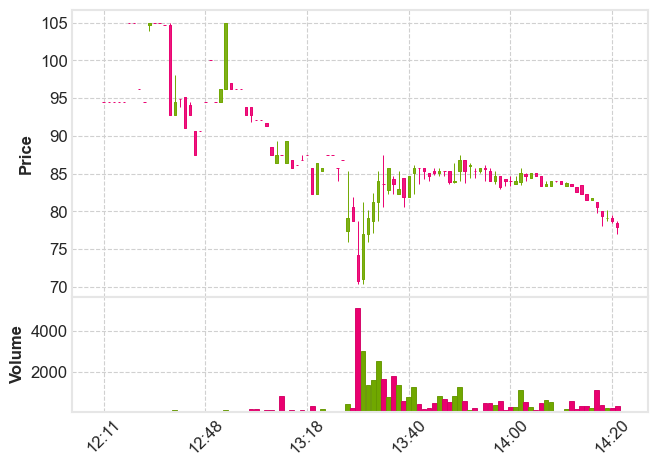

2019-04-10 12:21:09 @behindthebid @Shiningboy Hey @behindthebid, how do you like this one? $HSDT

https://t.co/n7HQ7M6Tiw


In [23]:
symbol = tweets.iloc[index].first_symbol
print('the symbol:', symbol)
vis_period_start = tweets.iloc[index].created_at - timedelta(hours=2)
vis_period_end = tweets.iloc[index].created_at + timedelta(hours=2)

plot(market_data, vis_period_start, vis_period_end)

print(tweets.iloc[index].created_at, tweets.iloc[index].text)

### Your turn...

In [14]:
tweets.head()

,created_at,text,in_reply_to_screen_name,account_location,account_description,account_followers_count,account_friends_count,account_listed_count,account_created_at,account_favourites_count,...,is_quote_status,retweet_count,twitter_url,hashtags,symbols,user_mentions,is_retweet,first_symbol,sigma_price,sigma_volume
0,2019-04-10 12:21:09,"@behindthebid @Shiningboy Hey @behindthebid, h...",behindthebid,"New York, NY",Official twitter account for White Diamond Res...,3026,22,97,2014-09-05 19:55:16,91,...,False,0,https://t.co/n7HQ7M6Tiw,['HSDT'],['HSDT'],"['behindthebid', 'Shiningboy', 'behindthebid']",False,HSDT,inf,2.18
1,2019-05-09 20:50:18,Is it bad to Miss Revenue Estimates and Reduce...,NaN,NaN,Dancing on Stock's Graves. Enjoy exposing Prom...,6454,171,149,2016-05-24 20:20:23,3909,...,False,0,NaN,['SSTI'],['SSTI'],"['shotspotter', 'Keubiko', 'goodetrades', 'Hin...",False,SSTI,236.46,19.65
2,2019-02-11 21:06:45,"New report out tomorrow, a la $MAXR&gt; a term...",NaN,"New York, NY",Activist Inv Manager Founded By Yale-Trained S...,30814,254,710,2014-03-04 13:56:22,3178,...,False,8,NaN,['MAXR'],['MAXR'],NaN,False,MAXR,52.33,-0.32
3,2019-04-22 13:28:03,$TDOC needs to provide full transparency on it...,NaN,NaN,Short Only Research. Assume we have positions ...,3907,264,107,2018-12-17 15:51:55,1004,...,False,1,NaN,"['TDOC', 'TDOC']","['TDOC', 'TDOC']",['TeladocHealth'],False,TDOC,37.31,464.32
4,2019-04-22 13:28:03,"$TDOC is also using a ""claims savings"" of $492...",FriendlyBearSA,NaN,Short Only Research. Assume we have positions ...,3907,264,107,2018-12-17 15:51:55,1004,...,False,1,NaN,['TDOC'],['TDOC'],['TeladocHealth'],False,TDOC,37.31,464.32


In [16]:
tweets.tail()

,created_at,text,in_reply_to_screen_name,account_location,account_description,account_followers_count,account_friends_count,account_listed_count,account_created_at,account_favourites_count,...,is_quote_status,retweet_count,twitter_url,hashtags,symbols,user_mentions,is_retweet,first_symbol,sigma_price,sigma_volume
4641,2020-12-29 00:41:31,Any idea what this $PEN confidential treatment...,NaN,NYC,Exposing bad companies. Class of 2020. I write...,9771,617,186,2017-01-31 06:00:12,8387,...,False,1,NaN,['PEN'],['PEN'],"['QCMFunds', 'AlderLaneeggs', 'AureliusValue']",False,PEN,NaN,NaN
4642,2020-12-29 11:44:42,RT @CapitolistPig: To be clear - IF $PEN is ac...,NaN,NaN,All tweets express our opinion and you should ...,21842,708,442,2015-12-05 14:52:30,2796,...,False,1,NaN,['PEN'],['PEN'],['CapitolistPig'],True,PEN,NaN,NaN
4643,2020-12-29 12:04:44,Another essential admission that @Grenke_AG fa...,NaN,NaN,A group of individuals that see the world diff...,23876,57,330,2016-12-23 04:00:11,1894,...,False,0,https://t.co/qrJ1Na5aGq,['GLJ'],['GLJ'],"['grenke_ag', 'finanz_business', 'caro_columna']",False,GLJ,NaN,NaN
4644,2020-12-30 00:16:55,"Quick thought. $VOW, $TM &amp; $RNO sell $tsla...",NaN,Hong Kong,Exposing creative accounting at listed compani...,2241,377,65,2016-10-25 07:35:43,723,...,True,0,https://t.co/vXda38eBLB,"['VOW', 'TM', 'RNO', 'tsla', 'tslaq']","['VOW', 'TM', 'RNO', 'tsla', 'tslaq']",[],False,VOW,NaN,NaN
4645,2020-12-30 17:21:36,Finished @tomburgis brilliant &amp; scary #kle...,NaN,Hong Kong,Exposing creative accounting at listed compani...,2241,377,65,2016-10-25 07:35:43,723,...,False,0,NaN,['RNOFP'],['RNOFP'],"['tomburgis', 'TESLAcharts']",False,RNOFP,NaN,NaN


In [18]:
tweets.shape

(4646, 24)

In [57]:
# how many tweets per ticker


# get unique list of first_symbol
unique_first_symbol = tweets['first_symbol'].unique()
print(f'there are {len(unique_first_symbol)} unique symbols \n')
print(unique_first_symbol)








there are 685 unique symbols 

['HSDT' 'SSTI' 'MAXR' 'TDOC' 'AXDX' 'AYX' 'TPC' 'ONE' 'JYNT' 'EVER' 'KRNT'
 'WDFC' 'LX' 'MNK' 'KIDS' 'APYX' 'VBIV' 'PTI' 'LOCO' 'ATOM' 'EBIX' 'AOS'
 'OPRA' 'SENS' 'XPO' 'T' 'GFL' 'PAYS' 'ATEC' 'MEET' 'VSLR' 'ATNX' 'AAPL'
 'ENOB' 'CHD' 'OMCL' 'TWOU' 'BFYT' 'MPWR' 'XSPA' 'TSLA' 'HX' 'NUVA' 'TRNX'
 'CVNA' 'CAN' 'WRTC' 'INS' 'LMND' 'AJRD' 'VRNT' 'PUMP' 'MTD' 'MIDD' 'TEUM'
 'CPAH' 'MDLA' 'LCI' 'HRC' 'tsla' 'BSGM' 'TR' 'GSX' 'AMCR' 'WBT' 'ENPH'
 'IOVA' 'CTAS' 'FSCT' 'AVY' 'STAA' 'DXCM' 'PEN' 'MVIS' 'PLL' 'NOVA' 'NKLA'
 'CFMS' 'LPSN' 'XXII' 'NYCB' 'RIOT' 'SAP' 'CODX' 'NBEV' 'APO' 'TLSA'
 'INMD' 'DBX' 'ALGN' 'YEXT' 'DOX' 'cvv' 'SF' 'HYLN' 'NBIX' 'HEXO' 'VNDA'
 'SLS' 'kzia' 'BLNK' 'BDSI' 'AGRX' 'TRXC' 'K' 'TRIT' 'CLSK' 'CORT' 'TRCH'
 'COLM' 'IRBT' 'FCEL' 'TD' 'WKHS' 'FFHL' 'BE' 'GP' 'ALXN' 'PLUG' 'CUB'
 'IIPR' 'KHC' 'AMZN' 'CELH' 'SRNE' 'WMK' 'ZYXI' 'CETX' 'GRUB' 'GTS' 'ATRC'
 'LB' 'AREC' 'MDXG' 'PETQ' 'VUZI' 'KKR' 'UBER' 'TTOO' 'SPWH' 'Real' 'INO'
 'NTUS' 'ROOT' 

In [58]:
f = tweets.groupby('first_symbol').count()
# print(f'HDST ocurs {f} times.')
print(f)

# for each symbol in unique get frequency



size_of_tweets = tweets.shape[0]
# for i in range(size_of_tweets):
#     print(tweets.first_symbol)


              created_at  text  in_reply_to_screen_name  account_location  \
first_symbol                                                                
AAL                    1     1                        1                 1   
AAPL                   4     4                        0                 2   
AAXN                  30    30                        2                30   
ABEO                   1     1                        0                 0   
ABF                    1     1                        1                 1   
...                  ...   ...                      ...               ...   
wfc                    1     1                        1                 0   
wkhs                   1     1                        1                 0   
wpp                    1     1                        1                 1   
wtcau                  1     1                        1                 1   
wwr                    1     1                        0                 1   

In [59]:
# cleanest way to get tweet frequency
tweets['first_symbol'].value_counts()



MDXG     134
GLJ      125
ATNX     110
TEUM      82
GFL       80
        ... 
IGC        1
wpp        1
WATT       1
BWA        1
MMNFF      1
Name: first_symbol, Length: 685, dtype: int64

In [79]:
# the average occurance
avg = round( stat.mean(tweets['first_symbol'].value_counts()), 1)
std = round( stat.stdev(tweets['first_symbol'].value_counts()), 1)

describe = (avg, std)
print('(avg, std) = ', describe)



(avg, std) =  (6.8, 14.6)


In [73]:
# just noticed that sigma_price is blank for many, discard

tweets_no_sig = tweets.dropna(subset=['sigma_price'])
tweets_no_sig






,created_at,text,in_reply_to_screen_name,account_location,account_description,account_followers_count,account_friends_count,account_listed_count,account_created_at,account_favourites_count,...,is_quote_status,retweet_count,twitter_url,hashtags,symbols,user_mentions,is_retweet,first_symbol,sigma_price,sigma_volume
0,2019-04-10 12:21:09,"@behindthebid @Shiningboy Hey @behindthebid, h...",behindthebid,"New York, NY",Official twitter account for White Diamond Res...,3026,22,97,2014-09-05 19:55:16,91,...,False,0,https://t.co/n7HQ7M6Tiw,['HSDT'],['HSDT'],"['behindthebid', 'Shiningboy', 'behindthebid']",False,HSDT,inf,2.18
1,2019-05-09 20:50:18,Is it bad to Miss Revenue Estimates and Reduce...,NaN,NaN,Dancing on Stock's Graves. Enjoy exposing Prom...,6454,171,149,2016-05-24 20:20:23,3909,...,False,0,NaN,['SSTI'],['SSTI'],"['shotspotter', 'Keubiko', 'goodetrades', 'Hin...",False,SSTI,236.46,19.65
2,2019-02-11 21:06:45,"New report out tomorrow, a la $MAXR&gt; a term...",NaN,"New York, NY",Activist Inv Manager Founded By Yale-Trained S...,30814,254,710,2014-03-04 13:56:22,3178,...,False,8,NaN,['MAXR'],['MAXR'],NaN,False,MAXR,52.33,-0.32
3,2019-04-22 13:28:03,$TDOC needs to provide full transparency on it...,NaN,NaN,Short Only Research. Assume we have positions ...,3907,264,107,2018-12-17 15:51:55,1004,...,False,1,NaN,"['TDOC', 'TDOC']","['TDOC', 'TDOC']",['TeladocHealth'],False,TDOC,37.31,464.32
4,2019-04-22 13:28:03,"$TDOC is also using a ""claims savings"" of $492...",FriendlyBearSA,NaN,Short Only Research. Assume we have positions ...,3907,264,107,2018-12-17 15:51:55,1004,...,False,1,NaN,['TDOC'],['TDOC'],['TeladocHealth'],False,TDOC,37.31,464.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,2019-04-11 16:09:07,"Yet again, the poster child for robotics stock...",NaN,"New York, NY",Activist Inv Manager Founded By Yale-Trained S...,30814,254,710,2014-03-04 13:56:22,3178,...,False,2,https://t.co/CmvpOSmvnE,"['IRBT', 'WMT']","['IRBT', 'WMT']",NaN,False,IRBT,-1.58,-0.82
2707,2020-12-30 21:49:58,Given the t+2 settlement cycle ... can people ...,NaN,NaN,Do your own Due Diligence ... UNEMON's opinons...,8832,204,246,2013-01-20 01:20:50,1426,...,False,0,NaN,['LMND'],['LMND'],[],False,LMND,-2.05,-0.60
2708,2020-08-18 13:26:28,In my 20yr career I had a front row seat watch...,NaN,"New York, NY",Activist Inv Manager Founded By Yale-Trained S...,30814,254,710,2014-03-04 13:56:22,3178,...,False,19,NaN,"['GFL', 'GFLU']","['GFL', 'GFLU']",NaN,False,GFL,-2.97,4.78
2709,2020-03-31 23:45:34,@LFCCapital7 @AlderLaneeggs @unemon1 The fundi...,FriendlyBearSA,NaN,Short Only Research. Assume we have positions ...,3907,264,107,2018-12-17 15:51:55,1004,...,False,4,NaN,['BX'],['BX'],"['LFCCapital7', 'AlderLaneeggs', 'unemon1']",False,BX,-6.36,-5.30


In [75]:
# recount the clean data
tweets_no_sig['first_symbol'].value_counts()




ATNX    90
TEUM    78
GFL     68
WDFC    61
CHD     58
        ..
ONCY     1
AREC     1
AYRO     1
goog     1
CSTE     1
Name: first_symbol, Length: 410, dtype: int64

In [80]:
# the average occurance
avg = round( stat.mean(tweets_no_sig['first_symbol'].value_counts()), 1)
std = round( stat.stdev(tweets_no_sig['first_symbol'].value_counts()), 1)

describe_after = (avg, std)
print('(avg, std) = ', describe)
print('(avg, std) = ', describe_after)


(avg, std) =  (6.8, 14.6)
(avg, std) =  (6.6, 11.7)


In [87]:
# large sigma events (this was conveniently sorted in the CSV)

'''
assume +ve sigma = upmove,   -ve sigma = downmove

'''

# sigma threshold
'''
if sigma > n, then lets inspect
'''
n = int(input('value to be above >> '))
tweets_high_sig = tweets[tweets.sigma_price > 10]
tweets_high_sig










,created_at,text,in_reply_to_screen_name,account_location,account_description,account_followers_count,account_friends_count,account_listed_count,account_created_at,account_favourites_count,...,is_quote_status,retweet_count,twitter_url,hashtags,symbols,user_mentions,is_retweet,first_symbol,sigma_price,sigma_volume
0,2019-04-10 12:21:09,"@behindthebid @Shiningboy Hey @behindthebid, h...",behindthebid,"New York, NY",Official twitter account for White Diamond Res...,3026,22,97,2014-09-05 19:55:16,91,...,False,0,https://t.co/n7HQ7M6Tiw,['HSDT'],['HSDT'],"['behindthebid', 'Shiningboy', 'behindthebid']",False,HSDT,inf,2.18
1,2019-05-09 20:50:18,Is it bad to Miss Revenue Estimates and Reduce...,NaN,NaN,Dancing on Stock's Graves. Enjoy exposing Prom...,6454,171,149,2016-05-24 20:20:23,3909,...,False,0,NaN,['SSTI'],['SSTI'],"['shotspotter', 'Keubiko', 'goodetrades', 'Hin...",False,SSTI,236.46,19.65
2,2019-02-11 21:06:45,"New report out tomorrow, a la $MAXR&gt; a term...",NaN,"New York, NY",Activist Inv Manager Founded By Yale-Trained S...,30814,254,710,2014-03-04 13:56:22,3178,...,False,8,NaN,['MAXR'],['MAXR'],NaN,False,MAXR,52.33,-0.32
3,2019-04-22 13:28:03,$TDOC needs to provide full transparency on it...,NaN,NaN,Short Only Research. Assume we have positions ...,3907,264,107,2018-12-17 15:51:55,1004,...,False,1,NaN,"['TDOC', 'TDOC']","['TDOC', 'TDOC']",['TeladocHealth'],False,TDOC,37.31,464.32
4,2019-04-22 13:28:03,"$TDOC is also using a ""claims savings"" of $492...",FriendlyBearSA,NaN,Short Only Research. Assume we have positions ...,3907,264,107,2018-12-17 15:51:55,1004,...,False,1,NaN,['TDOC'],['TDOC'],['TeladocHealth'],False,TDOC,37.31,464.32
5,2019-09-17 13:25:31,We have published an extensive report on Accel...,NaN,"New York, NY",Official twitter account for White Diamond Res...,3026,22,97,2014-09-05 19:55:16,91,...,False,3,https://t.co/QQrUkIAMrF,['AXDX'],['AXDX'],NaN,False,AXDX,34.65,-1.39
6,2019-12-11 20:38:49,"We are LONG shares of Alteryx, Inc. $AYX\nIt i...",NaN,"New York, NY",Activist Inv Manager Founded By Yale-Trained S...,30814,254,710,2014-03-04 13:56:22,3178,...,False,15,NaN,['AYX'],['AYX'],NaN,False,AYX,18.84,21.23
7,2019-08-06 15:46:39,Tutor Perini $TPC on its way to $0. Claims/una...,NaN,NYC,Team of forensic accountants/analysts on the l...,5423,104,184,2013-09-10 04:35:21,157,...,False,1,NaN,['TPC'],['TPC'],NaN,False,TPC,18.10,71.90
8,2020-05-26 14:40:58,The Bear Cave is out\n\n• Awesome Interview wi...,NaN,NYC,Exposing bad companies. Class of 2020. I write...,5690,571,122,2017-01-31 06:00:12,6055,...,False,8,https://t.co/iAn9wTDnLP,['ONE'],['ONE'],['KerrisdaleCap'],False,ONE,16.22,11.01
9,2019-05-23 14:00:54,"$JYNT If it sounds too good to be true, it pro...",NaN,NaN,Short Only Research. Assume we have positions ...,3907,264,107,2018-12-17 15:51:55,1004,...,False,2,https://t.co/JVoJQ5Cy7A,"['JYNT', 'JYNT']","['JYNT', 'JYNT']",NaN,False,JYNT,15.74,26.38


In [88]:
# who from
tweets_high_sig['first_symbol'].value_counts()


# what % of these are correct or incorrect ?


# correct or incorrect


# some form of correctness score


KIDS    3
LX      3
TPC     2
VBIV    2
TDOC    2
AYX     2
LOCO    1
KRNT    1
EVER    1
MNK     1
APYX    1
ONE     1
SSTI    1
PTI     1
MAXR    1
JYNT    1
AXDX    1
WDFC    1
HSDT    1
Name: first_symbol, dtype: int64